# Desafío Boosting-Ensambles Secuenciales

* Integrantes:
    * César Flores
    * Hugo Contreras
    * Rodrigo Campos
    * Esteban Ramírez

### Ejercicio 1: Preprocesamiento

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('churn_train.csv').drop(columns = 'Unnamed: 0')
df_test = pd.read_csv('churn_test.csv').drop(columns = 'Unnamed: 0')

In [3]:
df_train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

__Representación Distributiva de los Atributos__

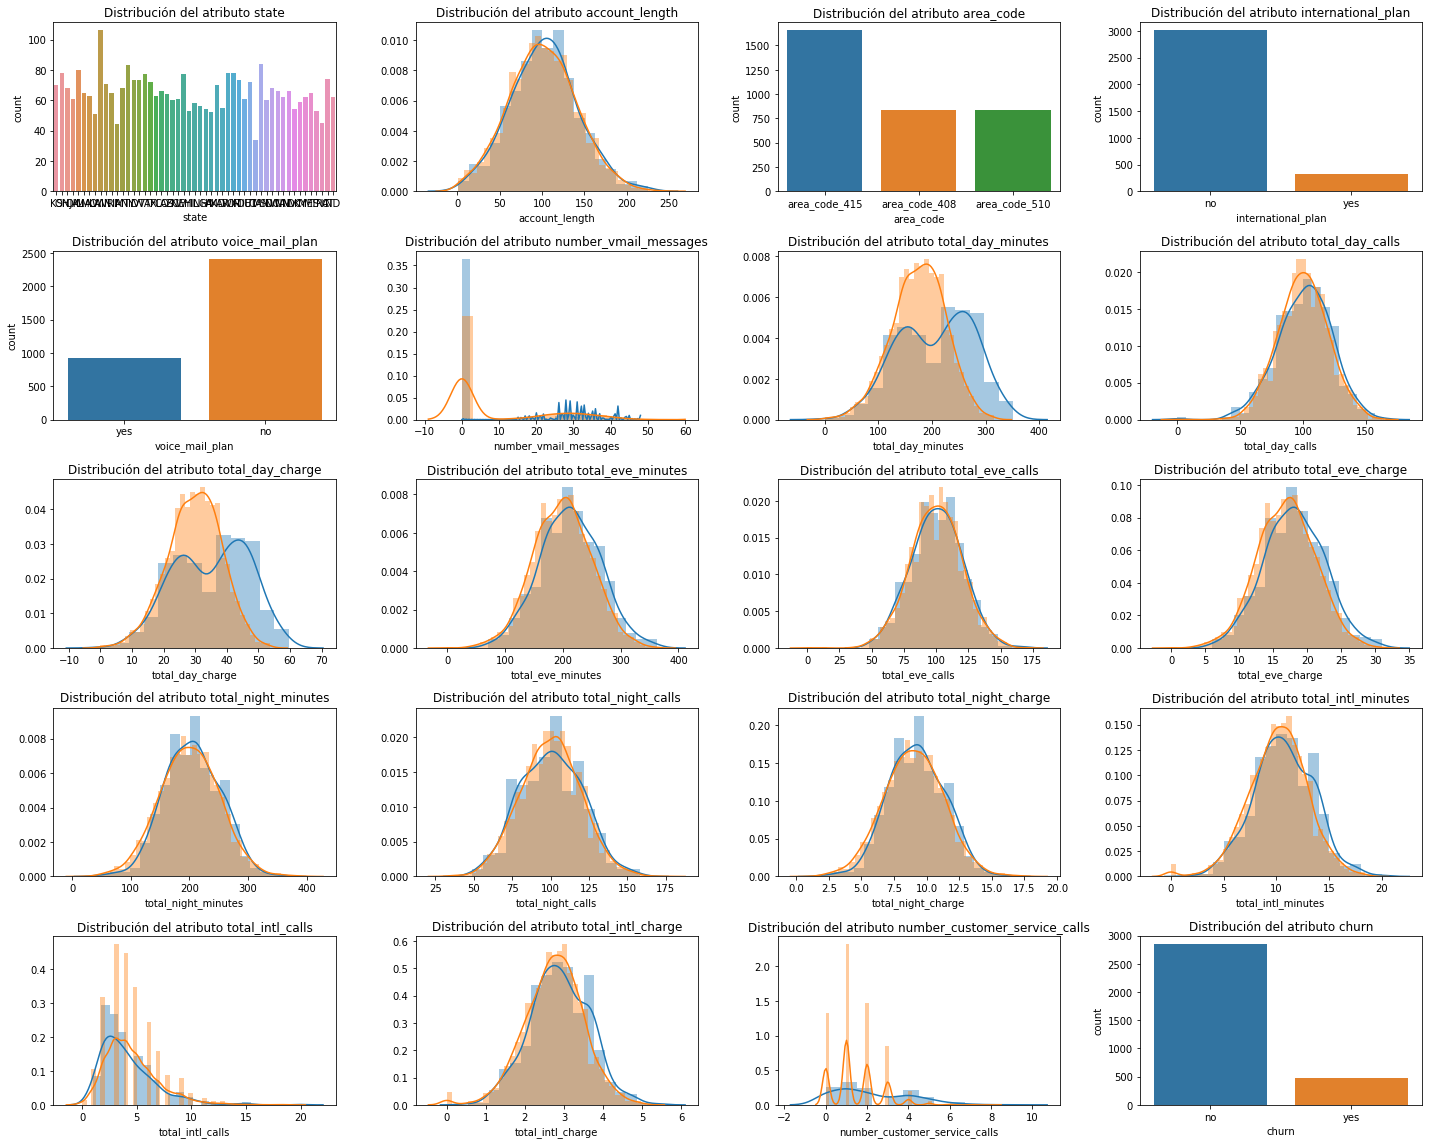

In [4]:
contador = 1
plt.figure(figsize = (20,16))
for i in df_train.columns:
    plt.subplot(5,4,contador)
    if df_train[i].dtype != 'O':
        sns.distplot(df_train[df_train['churn'] == 'yes'][i])
        sns.distplot(df_train[df_train['churn'] == 'no'][i])
    else:
        sns.countplot(df_train[i])
    plt.title('Distribución del atributo {}'.format(i))
    contador += 1
    plt.tight_layout()
plt.show()

* Como se puede observar la mayor parte de los atributos de tipo continuo siguien una distribución cercana a la campana de gauss, sin embargo, algunos tienen una distribución mas sesgada como es el caso de la variable 'total_intl_calls' y 'number_vmail_messages'. Respecto a las variables de tipo discretas existe cierto tipo de sesgo a una categoría particular. 

__Creación de Variables Dummies para las variables categóricas__

In [17]:
import aux_func

In [18]:
df_train_dummies = aux_func.dummies(df_train)

In [19]:
df_test_dummies = aux_func.dummies(df_test)

__Transformación de variables__

* Se decidió no transformar las variables dado que existen regsitros con valor 0, lo que trae consigo problemas de cálculo e inconsistencias posteriores.

### Ejercicio 2: Comparación de AdaBoost y Gradient Boosting

__Parámetros de grilla__

In [22]:
param_grid_ada = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}

In [23]:
param_grid_gradient = {'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000], 'subsample': [0.1,0.5,0.9]}

__División de las muestras en entrenamiento y test__

In [24]:
x = df_train_dummies[df_train_dummies.columns.difference(['churn_yes'])]
y = df_train_dummies['churn_yes']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 18417, test_size = 0.33)

__Intanciación del modelo Adaboost__

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
modelo_adaboost = AdaBoostClassifier(random_state=18417)
modelo_gradient = GradientBoostingClassifier(random_state=18417)

In [28]:
modelo_grilla_ada = GridSearchCV(modelo_adaboost, param_grid = param_grid_ada, cv = 2, n_jobs = -1)

In [29]:
modelo_grilla_ada.fit(x_train,y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=18417),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 500, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

__Prediccion__

In [30]:
predicted_ada = modelo_grilla_ada.predict(x_test)

__Métricas de Desempeño__

In [31]:
print(classification_report(y_test,predicted_ada))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       935
           1       0.65      0.33      0.44       165

    accuracy                           0.87      1100
   macro avg       0.77      0.65      0.68      1100
weighted avg       0.85      0.87      0.85      1100



* Como se puede observar el desempeño predictivo del modelo entrenado con AdaBoosting es alto tanto para predecir la clase 0 (No fuga) pero muy bajo para predecir la clase 1 (Fuga), obteniendo un promedio ponderado de 0.85.

__Intanciación del modelo con GradientBoosting__

In [32]:
modelo_grilla_gradient = GridSearchCV(modelo_gradient, param_grid = param_grid_gradient, cv = 2, n_jobs = -1)

In [33]:
modelo_grilla_gradient.fit(x_train,y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

__Prediccion__

In [34]:
predicted_gradient = modelo_grilla_gradient.predict(x_test)

__Métricas de Desempeño__

In [35]:
print(classification_report(y_test,predicted_gradient))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       935
           1       0.92      0.75      0.83       165

    accuracy                           0.95      1100
   macro avg       0.94      0.87      0.90      1100
weighted avg       0.95      0.95      0.95      1100



* Como se puede observar el desempeño predictivo del modelo entrenado con Gradient Boosting es alto tanto para predecir la clase 0 (No fuga) y 1 (Fuga), obteniendo un promedio ponderado de 0.95.

__Mejor Modelo__

* Como se puede observar el mejor modelo corresponde al modelo ajustado con GradientBoosting, el cual predice muy bien ambas clases y  obtiene un desempeño superior al modelo entrenado con AdaBoosting.

__Los hiperparámetros del mejor modelo son una tasa de aprendizaje de 0.01, 2000 estimadores y un sumbsample de 0.9__

In [36]:
modelo_grilla_gradient.best_params_

{'learning_rate': 0.01, 'n_estimators': 2000, 'subsample': 0.9}

__El mejor Modelo es__

In [37]:
best_model = modelo_grilla_gradient.best_estimator_

__Finalmente el score del mejor modelo ajustado es:__

In [38]:
modelo_grilla_gradient.best_score_

0.9373040752351097

### Ejercicio 3: Principales factores asociados

In [39]:
modelo_gradient_best = GradientBoostingClassifier(random_state=18417, learning_rate= 0.01, n_estimators= 2000, subsample= 0.9)

In [40]:
modelo_gradient_best.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=2000,
                           n_iter_no_change=None, presort='auto',
                           random_state=18417, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [41]:
dic = {'Atributo':df_train_dummies[df_train_dummies.columns.difference(['churn_yes'])].columns ,'Importancia': modelo_gradient_best.feature_importances_}
df_importance = pd.DataFrame(dic).sort_values(by = 'Importancia', ascending = False).head(20)

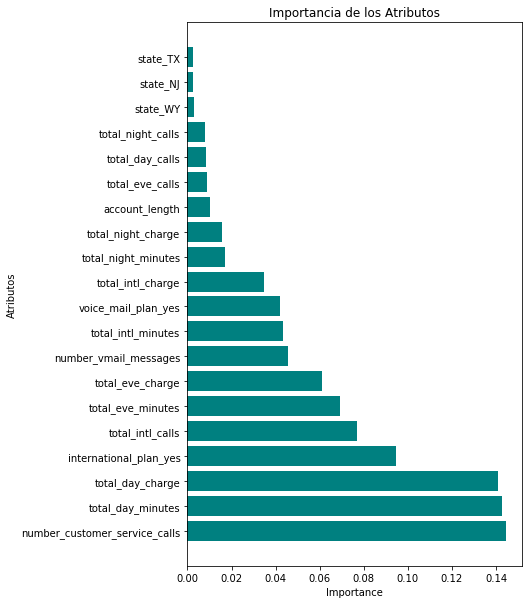

In [42]:
plt.figure(figsize = (6,10))
plt.barh(df_importance['Atributo'], df_importance['Importancia'], color = 'teal')
plt.title('Importancia de los Atributos')
plt.xlabel('Importance')
plt.ylabel('Atributos')
plt.show()

* Los atributos más importantes para explicar la fuga de los clientes, corresponden al número de llamadas del servicio a los clientes, el total de minutos por día, el número de días de la carga, si el plan es internacional, etc.

### Ejercicio 4: Probabilidad de fuga

In [43]:
x_test_2 = df_test_dummies[df_test_dummies.columns.difference(['churn_yes'])]
y_test_2 = df_test_dummies['churn_yes']

In [44]:
prediccion_test = modelo_gradient_best.predict_proba(x_test_2)

In [45]:
fuga_no = []
fuga_yes = []
for i,j in enumerate(prediccion_test):
    fuga_no.append(j[0])
    fuga_yes.append(j[1])

In [81]:
estado = df_test['state']

In [47]:
dic = {'Estado': estado, 'Probabilidad No Fuga' : fuga_no, 'Probabilidad Fuga' :fuga_yes }

In [48]:
df_estados = pd.DataFrame(dic)

In [60]:
agrupados = df_estados.groupby(['Estado']).mean().sort_values(by = ['Probabilidad Fuga'])
agrupados.head()

,Probabilidad No Fuga,Probabilidad Fuga
Estado,,
RI,0.964410,0.035590
VA,0.964136,0.035864
IL,0.962412,0.037588
NE,0.959360,0.040640
PA,0.954570,0.045430


In [70]:
X=agrupados.index.values

In [71]:
Y=agrupados['Probabilidad Fuga'].values

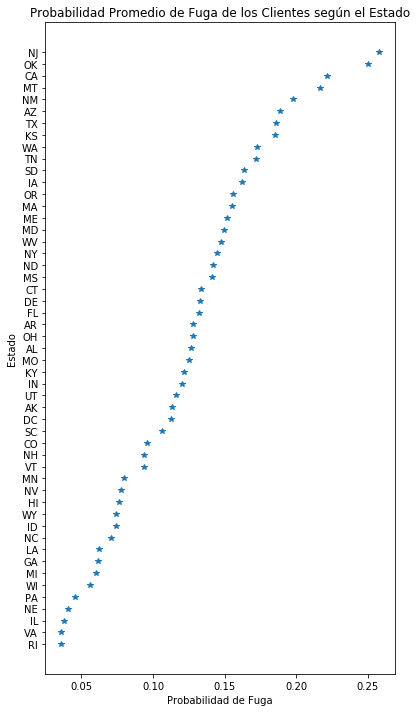

In [80]:
plt.figure(figsize = (6,10))
plt.title('Probabilidad Promedio de Fuga de los Clientes según el Estado')
plt.xlabel('Probabilidad de Fuga')
plt.ylabel('Estado')
plt.plot(Y,X, '*')
plt.tight_layout()
plt.show()

* Como se puede observar en el gráfico, los estados con mayor probabilidad de fuga promedio son los estados de NJ, OK, CA y MT.